# Mid-Frequency Trading Analysis (Synthetic Data)

This notebook demonstrates an end-to-end quantitative research workflow for mid-frequency trading strategies:

1. Generate synthetic OHLCV data  
2. Feature engineering  
3. Target/labels creation 
4. Simple modeling and visualization

The goal is to showcase Python, Pandas, NumPy, and basic financial analytics skills.


In [2]:
# Section 1: Synthetic Data Generation

import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate 100 days of synthetic stock data
dates = pd.date_range(start='2025-01-01', periods=100, freq='B')  # Business days

# Generate synthetic OHLCV data
open_prices = np.cumsum(np.random.randn(100)) + 100
close_prices = open_prices + np.random.randn(100)
high_prices = np.maximum(open_prices, close_prices) + np.random.rand(100)
low_prices = np.minimum(open_prices, close_prices) - np.random.rand(100)
volume = np.random.randint(100, 1000, size=100)

# Create DataFrame
data = pd.DataFrame({
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices,
    'Volume': volume
}, index=dates)

# Show first few rows
data.head()

data.to_csv("../data/synthetic_data.csv", index=False)



## Explanation

We created **synthetic OHLCV data** for 100 business days. OHLCV stands for:

- **Open:** Price at market open  
- **High:** Highest price of the day  
- **Low:** Lowest price of the day  
- **Close:** Price at market close  
- **Volume:** Number of shares traded  

This simulates a realistic stock-like dataset for testing strategy development.


In [3]:
# Section 2: Feature Engineering

# 5-day and 10-day Moving Averages
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()

# Momentum (difference between current close and close 5 days ago)
data['Momentum5'] = data['Close'] - data['Close'].shift(5)

# Volatility (5-day rolling standard deviation of Close)
data['Volatility5'] = data['Close'].rolling(window=5).std()

# Daily Returns
data['Return'] = data['Close'].pct_change()

# Show first 10 rows with features
data.head(10)


,Open,High,Low,Close,Volume,MA5,MA10,Momentum5,Volatility5,Return
2025-01-01,100.496714,101.374087,98.139879,99.081343,289,NaN,NaN,NaN,NaN,NaN
2025-01-02,100.358450,101.099218,99.551702,99.937805,604,NaN,NaN,NaN,NaN,0.008644
2025-01-03,101.006138,101.703154,99.702233,100.663424,290,NaN,NaN,NaN,NaN,0.007261
2025-01-06,102.529168,103.231652,100.821540,101.726891,607,NaN,NaN,NaN,NaN,0.010565
2025-01-07,102.295015,102.654506,101.937938,102.133729,468,100.708638,NaN,NaN,1.256189,0.003999
2025-01-08,102.060878,102.758521,101.991517,102.464929,508,101.385355,NaN,3.383585,1.055791,0.003243
2025-01-09,103.640091,106.335638,103.539313,105.526277,923,102.503050,NaN,5.588472,1.821016,0.029877
2025-01-10,104.407525,105.392217,104.389304,104.582103,216,103.286786,NaN,3.918679,1.668190,-0.008947
2025-01-13,103.938051,105.062674,103.843608,104.195601,233,103.780528,NaN,2.468710,1.440937,-0.003696
2025-01-14,104.480611,105.393852,103.723158,104.406165,157,104.235015,102.471827,2.272436,1.112641,0.002021


## Explanation

**Features created for trading analysis:**

- **MA5 / MA10:** Short-term trend indicators  
- **Momentum5:** Measures price change over 5 days  
- **Volatility5:** Captures recent price fluctuation  
- **Return:** Daily percentage change in closing price  

These features are common in mid-frequency quantitative strategies.


## Step 3: Target/Label Creation

In this step, we create a **target variable** for our trading strategy.  
We will generate a simple **next-day return-based label**:

- **1 (Buy/Long):** if the next day's return is positive  
- **0 (Hold/No trade):** if the next day's return is zero or negative  

This simulates a classification problem for predicting short-term market movements.


In [4]:
# Step 3: Create target column
data['Target'] = np.where(data['Return'].shift(-1) > 0, 1, 0)

# Drop last row where target is NaN
data = data.dropna()

# Show dataset with target
data.tail(10)


,Open,High,Low,Close,Volume,MA5,MA10,Momentum5,Volatility5,Return,Target
2025-05-07,91.204340,91.274908,90.646627,90.757825,900,90.483322,90.485073,0.164223,0.766357,0.013008,1
2025-05-08,92.172985,93.671803,91.680360,93.029384,473,90.835550,90.850704,1.761142,1.377971,0.025029,0
2025-05-09,91.470932,91.711537,91.459578,91.685025,164,90.962370,90.955484,0.634099,1.430911,-0.014451,0
2025-05-12,91.143269,91.729045,89.428870,89.897531,245,90.992436,90.778005,0.150330,1.400246,-0.019496,1
2025-05-13,90.751161,91.864573,90.694858,90.924342,323,91.258821,90.854649,1.331927,1.176066,0.011422,0
2025-05-14,89.287646,90.248438,89.168828,89.672964,338,91.041849,90.762585,-1.084861,1.374872,-0.013763,0
2025-05-15,89.583767,89.971937,88.582383,88.699909,276,90.175954,90.505752,-4.329474,1.156137,-0.010851,1
2025-05-16,89.844822,90.641835,89.195612,89.998547,878,89.838659,90.400514,-1.686478,0.795604,0.014641,0
2025-05-19,89.849935,90.366397,89.103891,89.908144,952,89.840781,90.416609,0.010613,0.795815,-0.001004,0
2025-05-20,89.615348,90.160965,87.889009,88.472378,381,89.350388,90.304605,-2.451964,0.712264,-0.015969,0


## Step 4: Data Exploration and Visualization

Before modeling, it’s important to **understand the data**:

- Plot closing price over time  
- Examine moving averages to see trends  
- Check correlation between features and target  

Visualization helps identify patterns and potential predictive relationships.


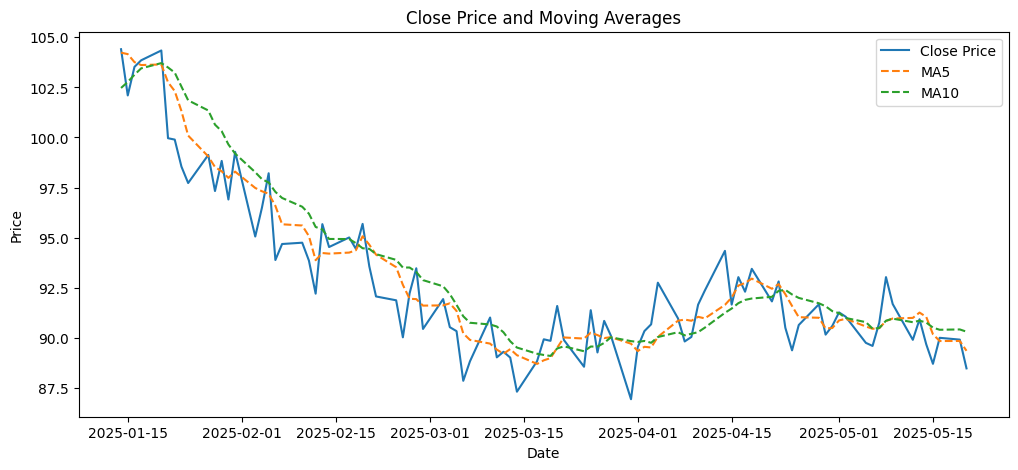

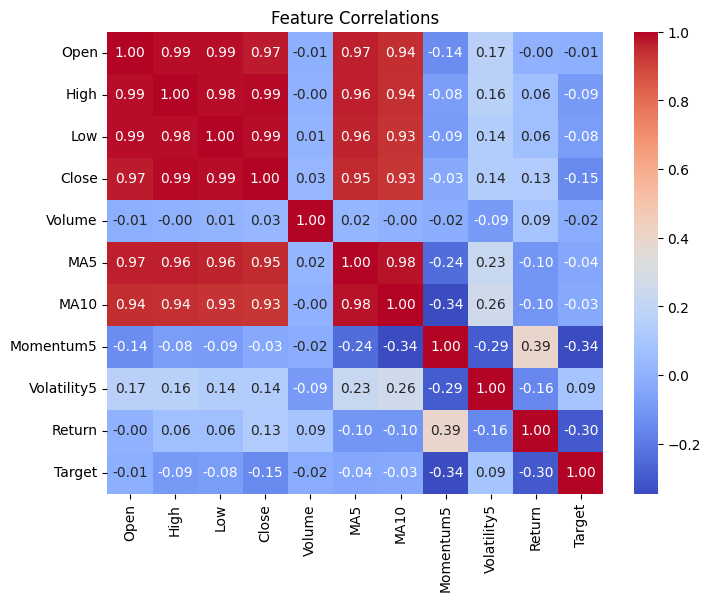

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Close price and moving averages
plt.figure(figsize=(12,5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA5'], label='MA5', linestyle='--')
plt.plot(data['MA10'], label='MA10', linestyle='--')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
# Save the figure
plt.savefig("../plots/close_price_ma.png")
plt.show()

# Heatmap of correlation
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlations")
plt.savefig("../plots/feature_correlation.png")
plt.show()


## Step 5: Simple Classification Model

We will use a **Logistic Regression classifier** as a baseline:

- Features: MA5, MA10, Momentum5, Volatility5, Return  
- Target: Next-day return (1 = up, 0 = down/flat)  

This demonstrates the ability to prepare features, train a model, and evaluate predictions.


Accuracy: 0.7368421052631579

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.64      0.88      0.74         8

    accuracy                           0.74        19
   macro avg       0.76      0.76      0.74        19
weighted avg       0.77      0.74      0.74        19



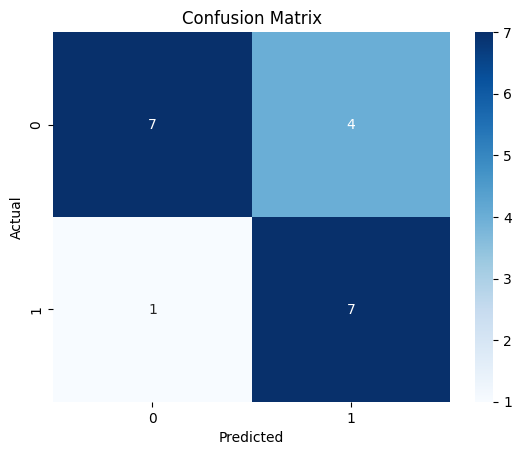

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target
features = ['MA5', 'MA10', 'Momentum5', 'Volatility5', 'Return']
X = data[features]
y = data['Target']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("../plots/confusion_matrix.png")
plt.show()
